In [1]:
import pandas as pd
import numpy as np
from readFile import split_into_values, toRPdata
# columns 와 value는 사용자 입력
df = pd.read_csv('resources/CLAMP_resample.csv')
columns = ['chip', 'wire', 'segment']
value = ['value']
#df = pd.read_csv('resources/Dataset1.csv')
#columns = ['Process', 'Step']
#value = ['Value']

df = df.loc[:, columns + value] #('chip', 'wire', 'value')는 사용자 입력
result = split_into_values(df, columns)
result

,0,1,2,3,4,5,6,7,8,9,...,1243,1244,1245,1246,1247,1248,1249,1250,1251,1252
0,2.236858,1.909297,1.554571,1.205214,1.132879,1.176786,1.213111,1.070968,0.866282,0.625586,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.064278,-0.015003,0.130296,0.255697,0.288548,0.372255,0.487549,0.563674,0.583890,0.762359,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.069648,0.044694,0.044378,0.048168,0.054486,0.059540,0.044378,0.026373,0.028900,0.035217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.004262,0.003630,0.007736,0.083546,0.171359,0.263910,0.351723,0.437325,0.524506,0.615794,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.121767,0.100919,0.092391,0.099340,0.123346,0.122399,0.107237,0.087968,0.080387,0.092075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,0.012159,0.011527,0.126189,0.243062,0.310344,0.389312,0.493235,0.585470,0.614530,0.763623,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1136,0.069648,0.049116,0.033006,0.042483,0.054170,0.060487,0.052906,0.035217,0.023530,0.030163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1137,-0.003950,-0.009003,-0.007740,-0.004582,0.004894,0.009948,0.096497,0.192207,0.278756,0.370044,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1138,0.068700,0.043114,0.025741,0.029532,0.054170,0.062383,0.051959,0.037744,0.015633,0.020056,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#시계열 셋 길이 통일
min=result.dropna(axis='columns')
min_len=len(min.columns)

from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler
result_ = TimeSeriesResampler(sz=min_len).fit_transform(result)

result_=result_.reshape(1140,min_len)
result_

array([[ 2.236858  ,  1.89591111,  1.52820443, ...,  0.01360757,
         0.10990657,  0.13377   ],
       [ 0.064278  ,  0.29486551,  0.61082872, ...,  0.11390553,
         0.08888651,  0.085757  ],
       [ 0.069648  ,  0.02865555,  0.01438208, ...,  0.011211  ,
        -0.01052236, -0.005213  ],
       ...,
       [-0.00395   ,  0.00651509,  0.33731811, ...,  0.08457143,
         0.08001181,  0.080387  ],
       [ 0.0687    ,  0.01630062,  0.02999089, ...,  0.00417862,
         0.02920011, -0.015951  ],
       [ 0.042483  ,  0.56848402,  1.15818502, ...,  2.50259802,
         2.35044785,  2.546415  ]])

In [4]:
#수치형 변수 정규화
from sklearn.preprocessing import StandardScaler
result_norm = StandardScaler().fit_transform(result_)

In [5]:
#주성분 분석 실시하기
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #PCA 객체 생성 (주성분 갯수 2개 생성)
result_pca = pca.fit_transform(result_norm)

In [6]:
result_pca

array([[-5.13369995,  1.89306301],
       [ 5.21951692, -2.91813154],
       [-7.28312141, -0.37237593],
       ...,
       [ 4.99399043, -3.3776612 ],
       [-7.28125624, -0.34002468],
       [ 8.76644455,  4.12138531]])

In [8]:
#같은 클러스터들끼리 리스트형태로 합침

result_label=[1,2,3,4,5,6]*190
result_list=result_pca.tolist()

result_cluster=[[],[],[],[],[],[]]

for i in range(0,1140):
    if result_label[i] ==1:
        result_cluster[0].append(result_list[i])
    elif result_label[i] ==2:
        result_cluster[1].append(result_list[i])
    elif result_label[i] ==3:
        result_cluster[2].append(result_list[i])
    elif result_label[i] ==4:
        result_cluster[3].append(result_list[i])
    elif result_label[i] ==5:
        result_cluster[4].append(result_list[i])
    elif result_label[i] ==6:
        result_cluster[5].append(result_list[i])

result_arr = np.array(result_cluster)

In [21]:
result_cluster[5]

[[8.606036823085109, 3.762689746495444],
 [8.545327307027636, 3.672193776984091],
 [8.542147077456358, 3.645944840055398],
 [8.503854139461454, 3.6218539880417837],
 [8.588526179367157, 3.7353161348314035],
 [8.590868633523817, 3.791627762931097],
 [8.638009787905373, 3.85957685788696],
 [8.597835708452452, 3.7983350406940337],
 [8.53302205056245, 3.6538207022344373],
 [8.610090710492143, 3.8323860810610144],
 [8.540271193154291, 3.6076694743369466],
 [8.530284439266374, 3.5909507431039245],
 [8.60091972759985, 3.707417399832154],
 [8.625538381081236, 3.752986948455012],
 [8.630230706588058, 3.7201384666648893],
 [8.573145910426518, 3.6373962642993884],
 [8.60140204230852, 3.8299248123242324],
 [8.6412554551435, 3.799714985281918],
 [8.599114656589272, 3.7961793182832024],
 [8.62091989231503, 3.937893031722225],
 [8.59631722654209, 3.7383006575711675],
 [8.5938689452089, 3.727821142389974],
 [8.546982192114239, 3.655442397825139],
 [8.584205607221286, 3.6706733735116446],
 [8.563584367

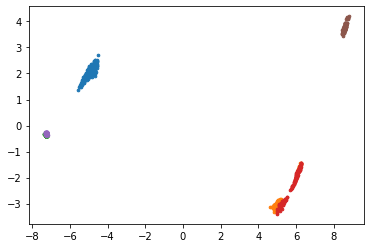

In [19]:
import matplotlib.pyplot as plt
plt.scatter(result_arr[0][:,0], result_arr[0][:,1],s=7)
plt.scatter(result_arr[1][:,0], result_arr[1][:,1],s=7)
plt.scatter(result_arr[2][:,0], result_arr[2][:,1],s=7)
plt.scatter(result_arr[3][:,0], result_arr[3][:,1],s=7)
plt.scatter(result_arr[4][:,0], result_arr[4][:,1],s=7)
plt.scatter(result_arr[5][:,0], result_arr[5][:,1],s=7)